In [83]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns

In [84]:
train = pd.read_csv('Data/Clean_train_data.csv')
test = pd.read_csv('Data/Clean_test_data.csv')

In [85]:
# train = train.sort_values(['Year','Month','Product_ID'])
# test = test.sort_values(['Year','Month','Product_ID'])

train = train.sort_values(['Product_ID','Year','Month'])
test = test.sort_values(['Product_ID','Year','Month'])

In [86]:
train.head()

,Year,Month,Country,Product_ID,Sales,Holiday,Expense_Price
0,2013,1,Argentina,1,3.434602e+07,1,14749.307
3,2013,1,Columbia,1,7.894713e+06,2,1893.122
9,2013,2,Argentina,1,6.401115e+07,1,12187.566
12,2013,2,Columbia,1,4.074073e+06,0,1977.945
18,2013,3,Argentina,1,1.301202e+08,3,13076.579


In [87]:
test.head()

,Year,Month,Country,Product_ID,Holiday,Expense_Price,S_No
15,2016,4,Argentina,1,1,8214.875,79073
18,2016,4,Columbia,1,0,1723.635,79112
24,2016,5,Argentina,1,2,10777.878,79074
27,2016,5,Columbia,1,3,1589.699,79113
33,2016,6,Argentina,1,2,10320.673,79075


<h3>Treating null values</h3>

In [88]:
train.isnull().sum()

Year              0
Month             0
Country           0
Product_ID        0
Sales             0
Holiday           0
Expense_Price    52
dtype: int64

In [89]:
test.isnull().sum()

Year             0
Month            0
Country          0
Product_ID       0
Holiday          0
Expense_Price    6
S_No             0
dtype: int64

In [90]:
# we can assume that zero price has been expended on these products having null expenditure
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

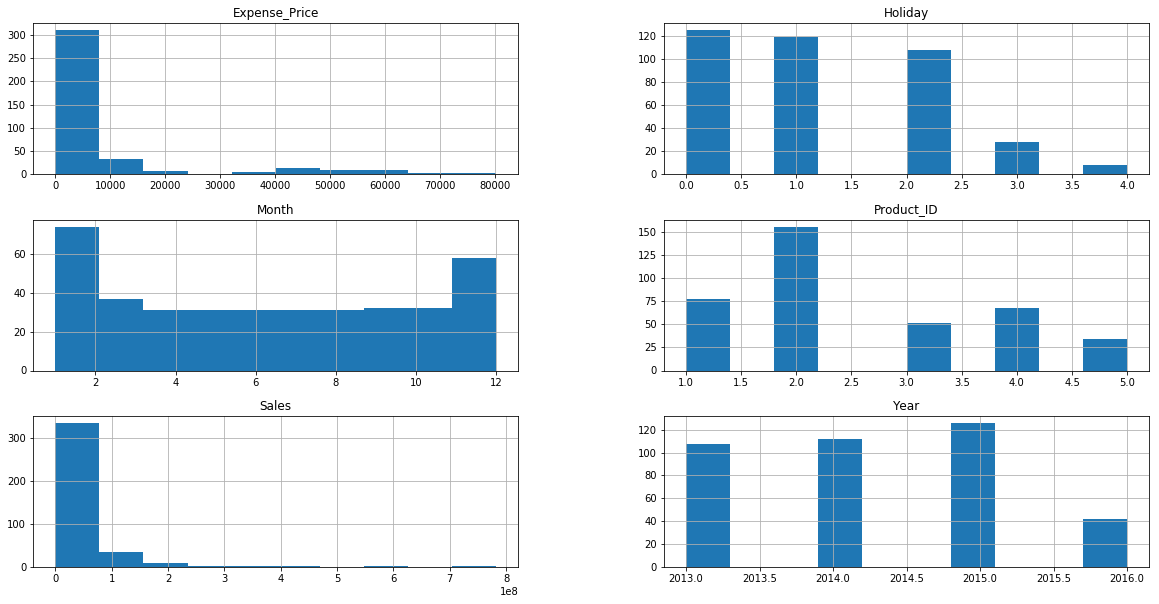

In [91]:
train.hist(figsize=(20,10))
plt.show()

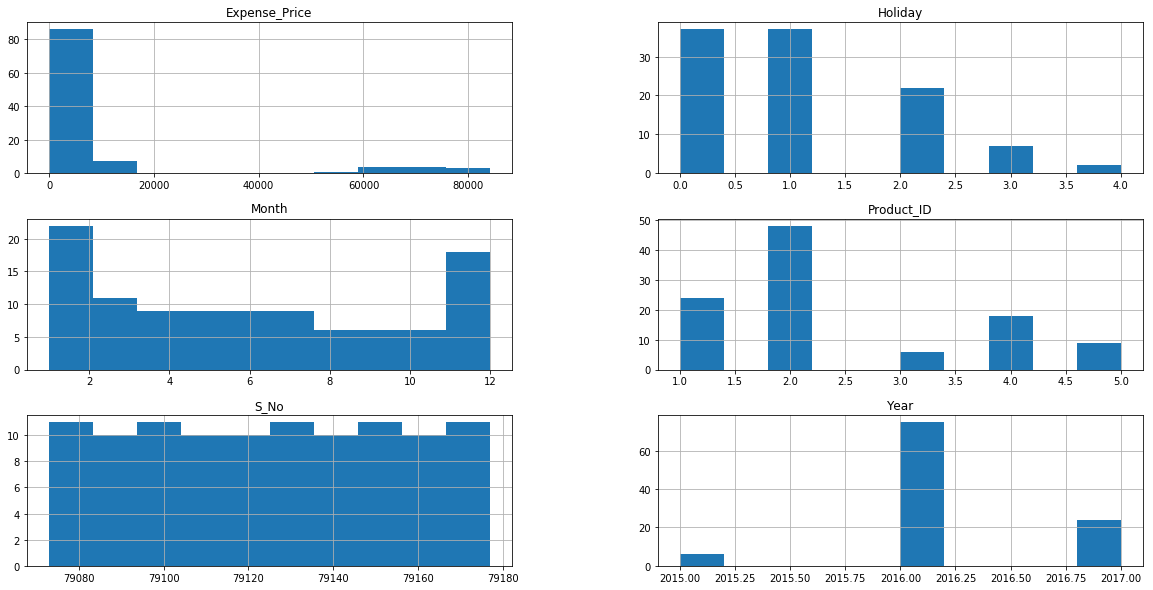

In [92]:
test.hist(figsize=(20,10))
plt.show()

<h3>Normalizing Price</h3>

In [93]:
train['Sales'] = np.log10(1+train['Sales'])
train['Expense_Price'] = np.log10(1+train['Expense_Price'])
test['Expense_Price'] = np.log10(1+test['Expense_Price'])

# Now let's visualize the distribution after normalization (with log transformation)

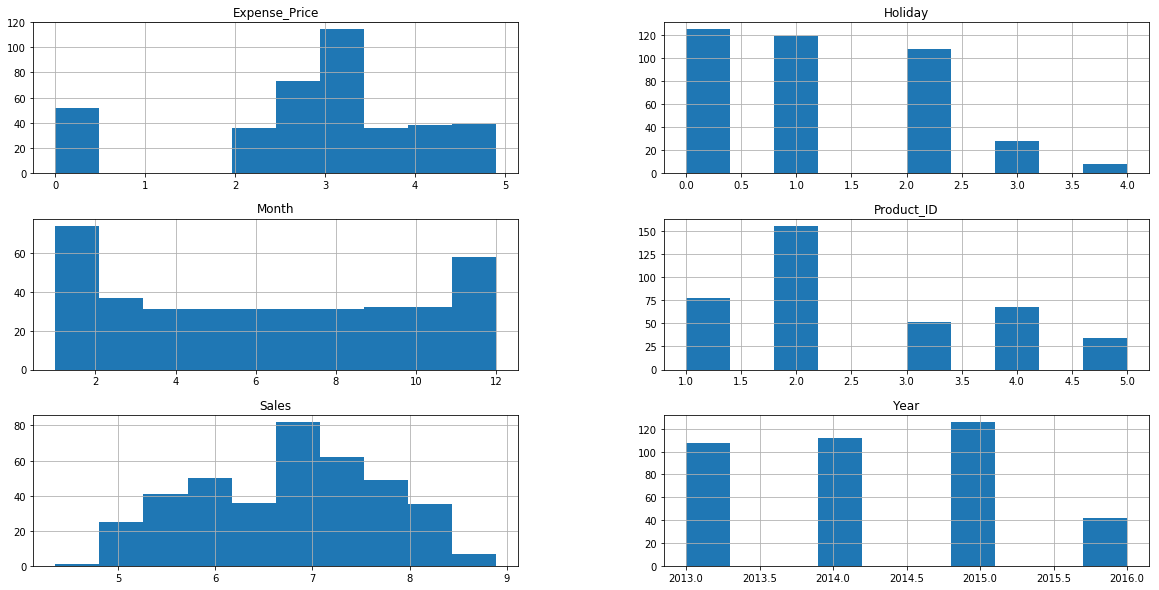

In [94]:
train.hist(figsize=(20,10))
plt.show()

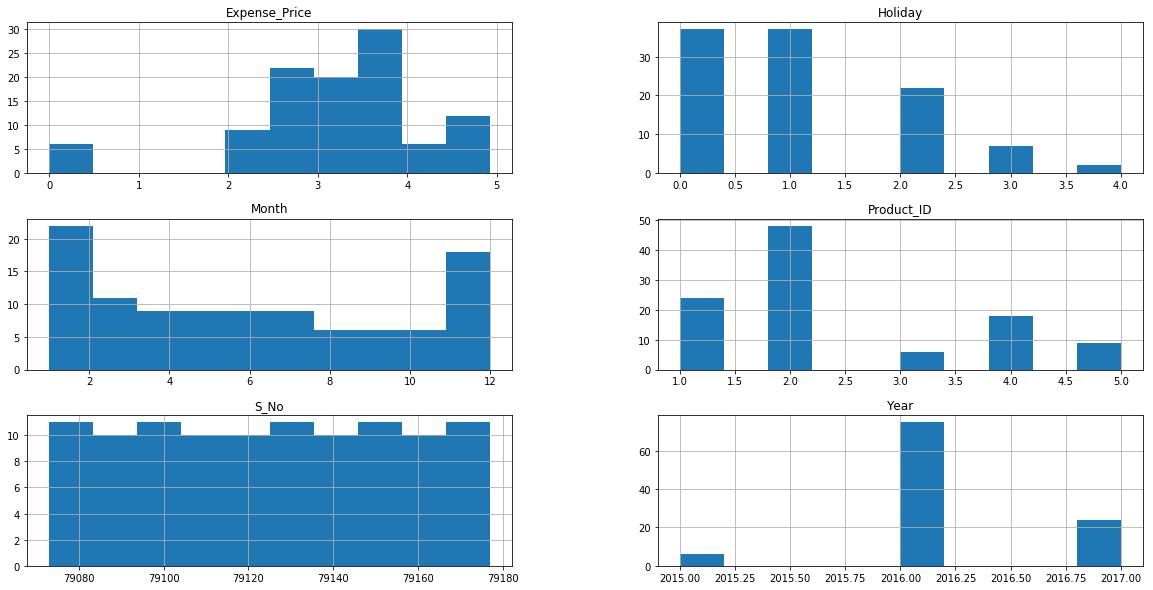

In [95]:
test.hist(figsize=(20,10))
plt.show()

<h3>Bivariate Analysis</h3>

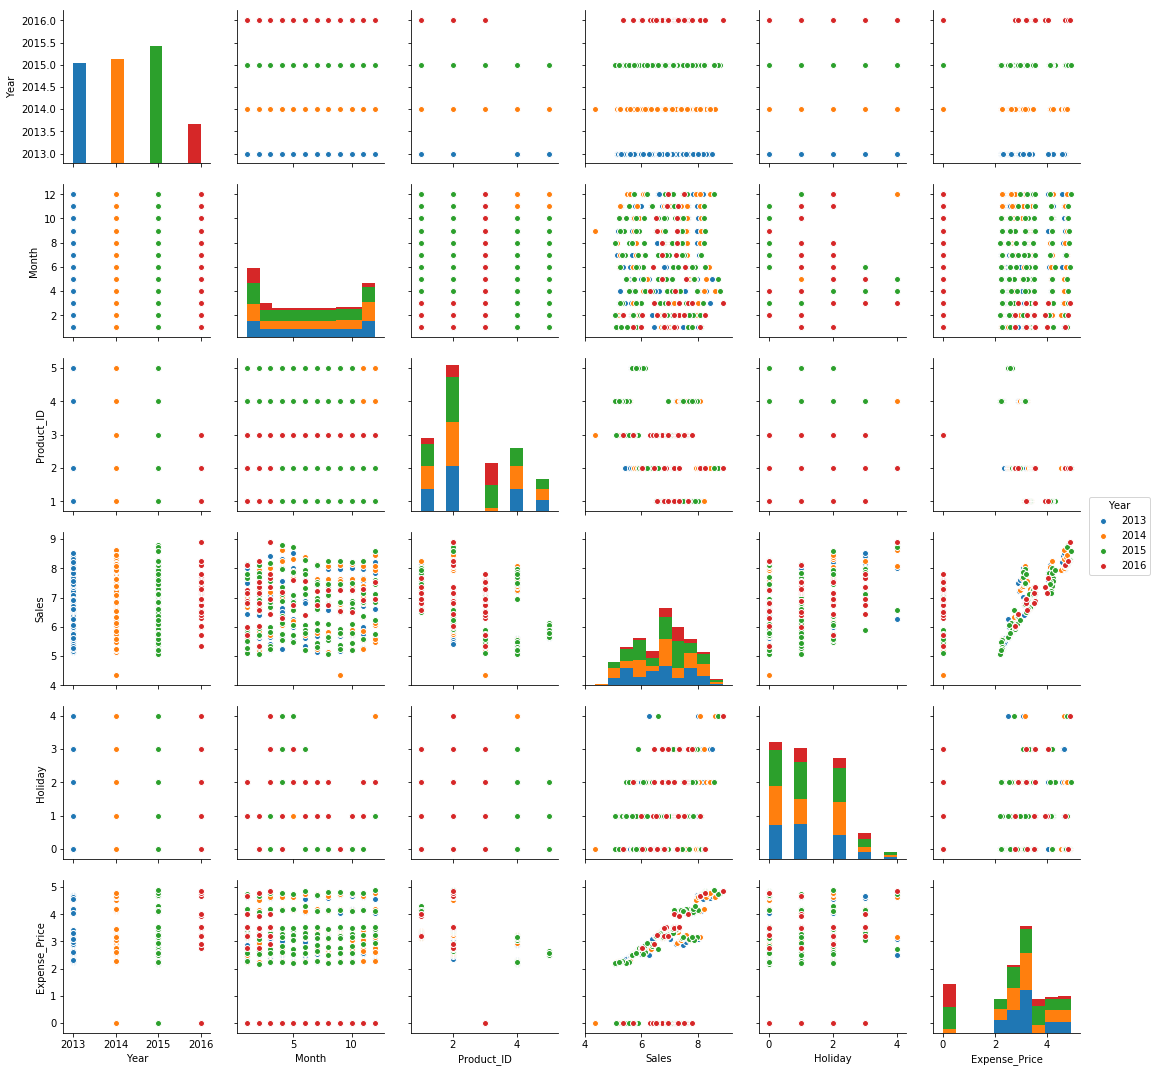

In [57]:
sns.pairplot(train,hue='Year')
plt.show()

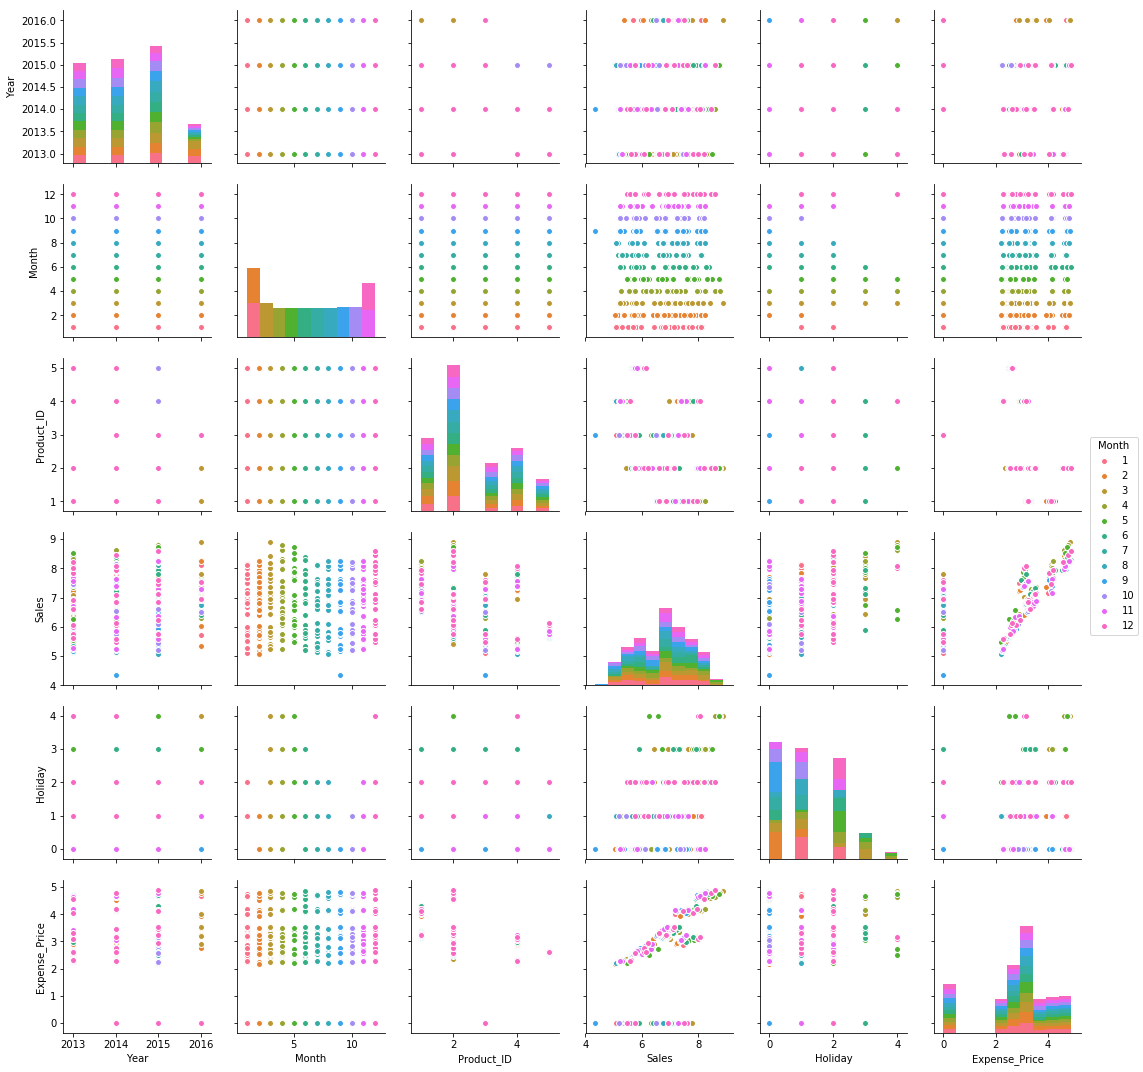

In [58]:
sns.pairplot(train,hue='Month')
plt.show()

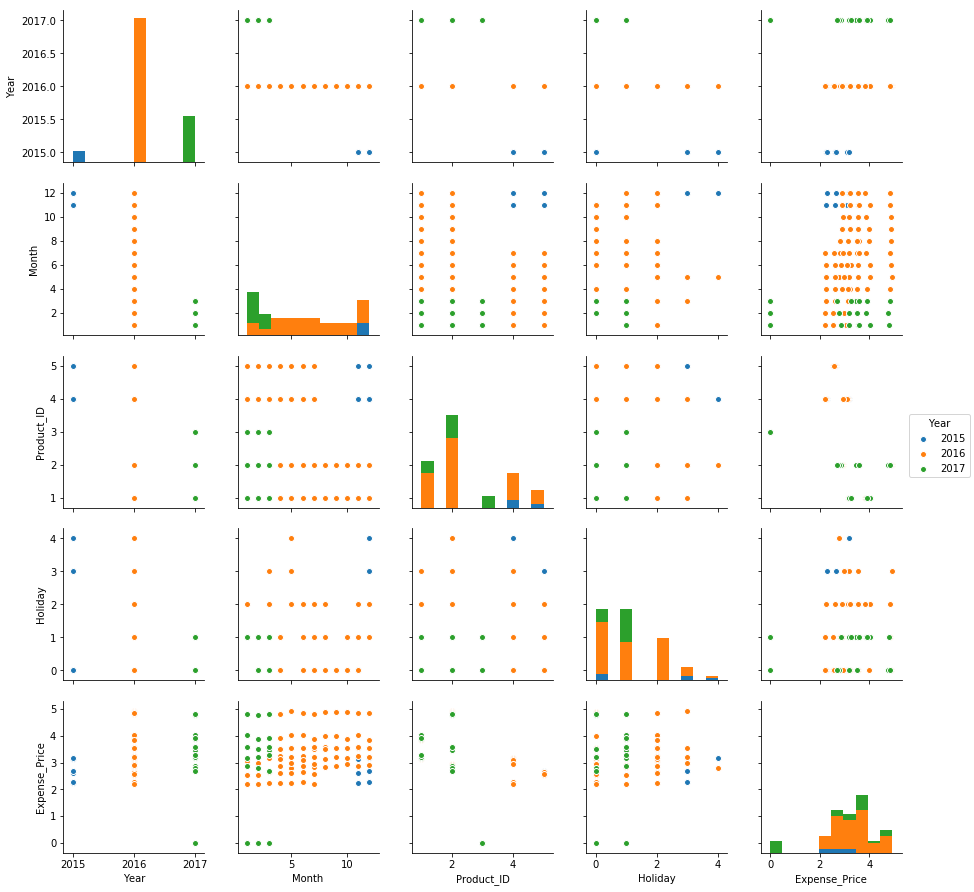

In [59]:
sns.pairplot(test,hue='Year')
plt.show()

In [96]:
# train.to_csv('Data/train_visual.csv',index=False)
# test.to_csv('Data/test_visual.csv',index=False)

------------------------------------- Product  1  ----------------------------------------------------------------------


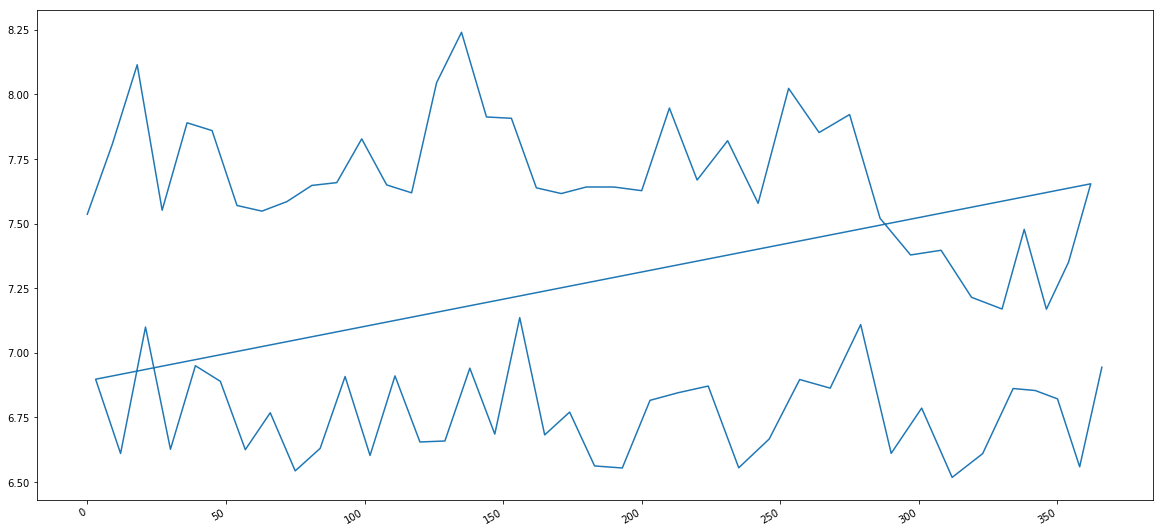

------------------------------------- Product  2  ----------------------------------------------------------------------


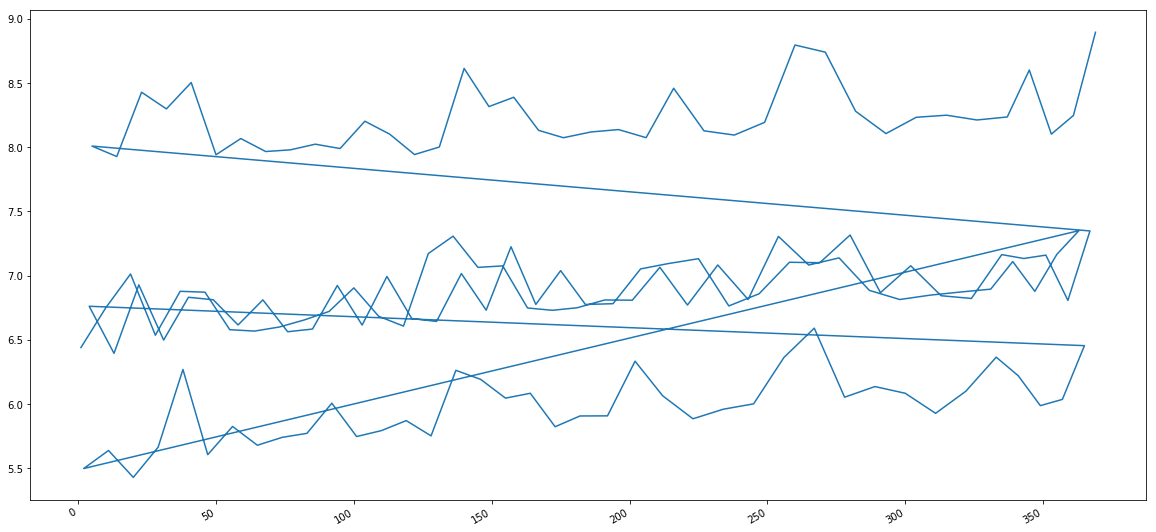

------------------------------------- Product  3  ----------------------------------------------------------------------


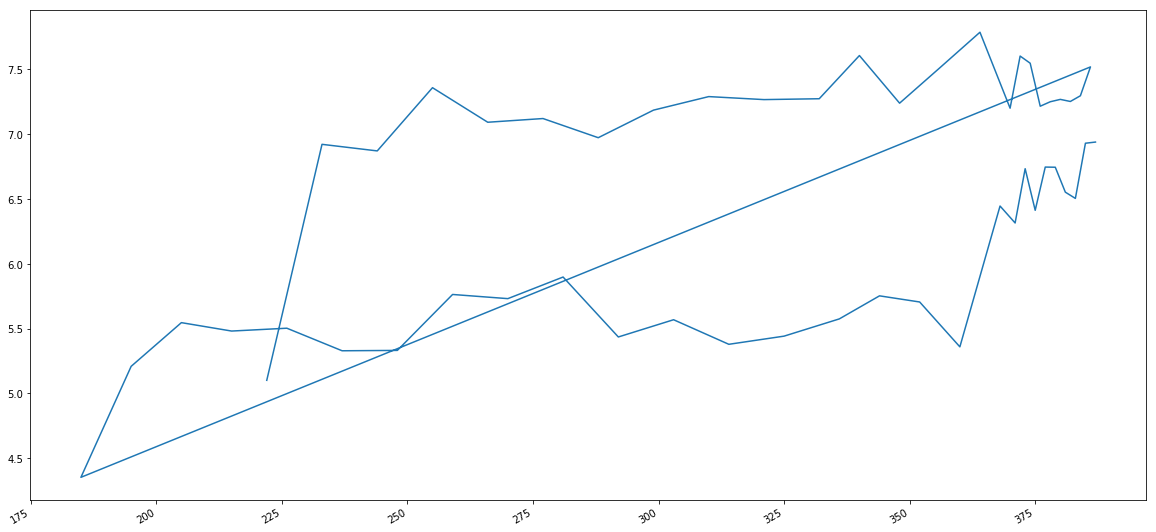

------------------------------------- Product  4  ----------------------------------------------------------------------


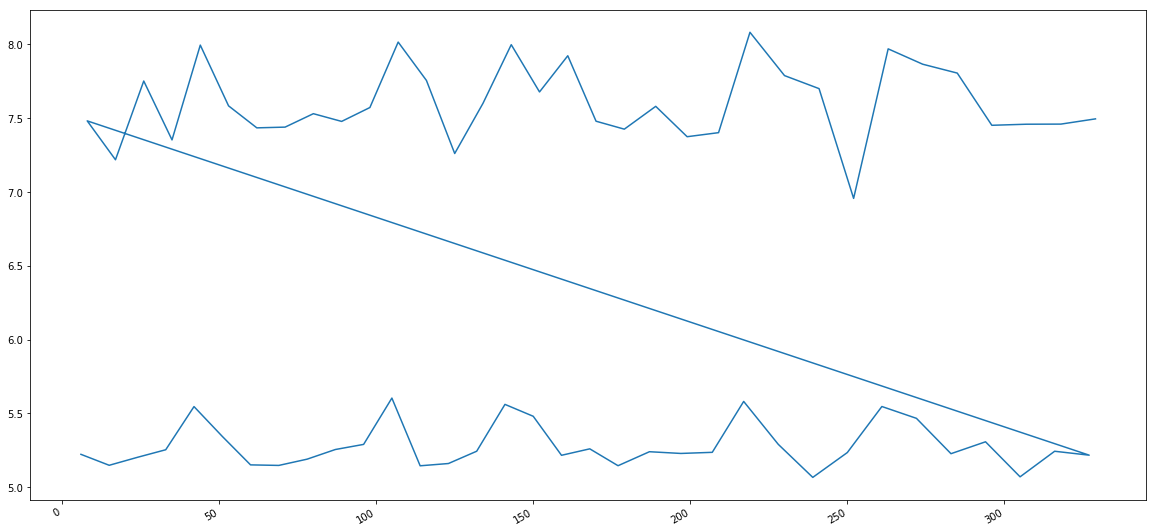

------------------------------------- Product  5  ----------------------------------------------------------------------


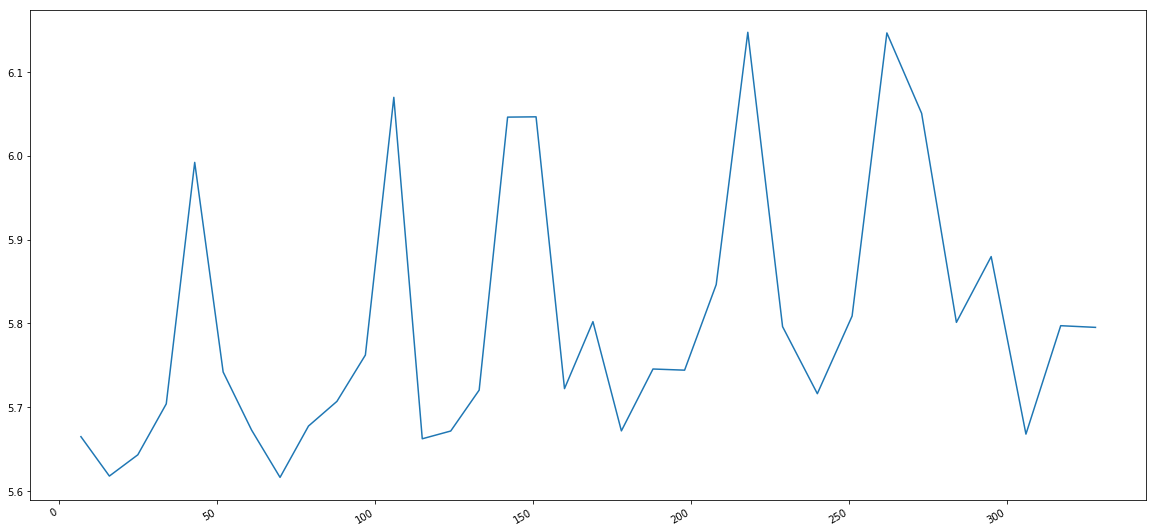

In [53]:
# Sales trend for Particular Product
for i in range(1,6):
    print('------------------------------------- Product ',i,' ----------------------------------------------------------------------')
    train[train['Product_ID']==i].sort_values(['Product_ID','Country','Year','Month'])['Sales'].plot(figsize=(20,10),kind='line',subplots=True)
    plt.show()

Product  1  in  Columbia
Product  1  in  Argentina


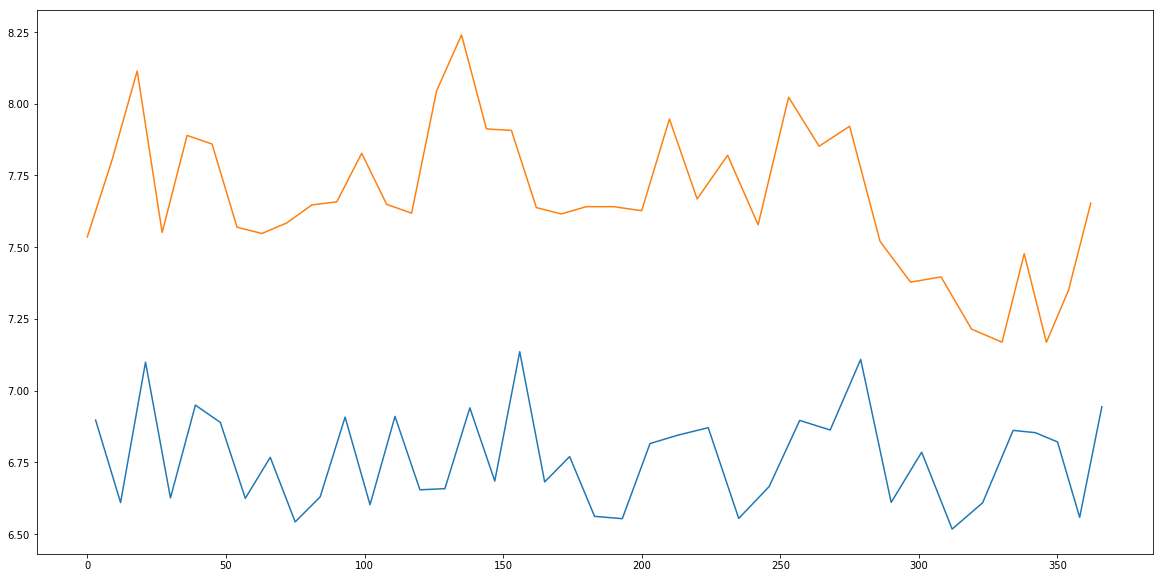

Product  2  in  Columbia
Product  2  in  Belgium
Product  2  in  Denmark
Product  2  in  Argentina


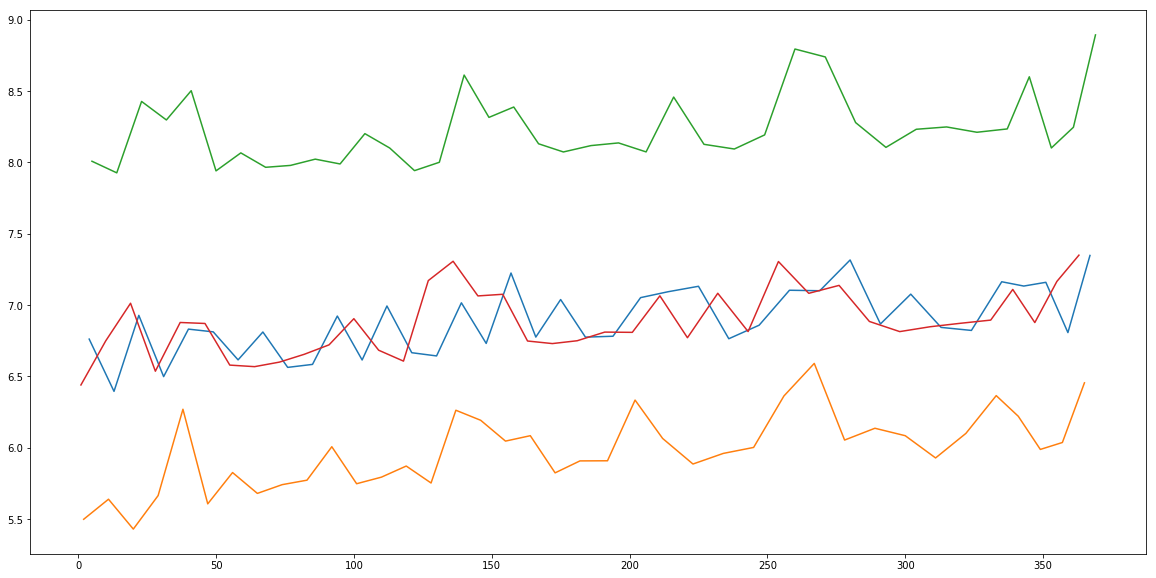

Product  3  in  Columbia
Product  3  in  Argentina


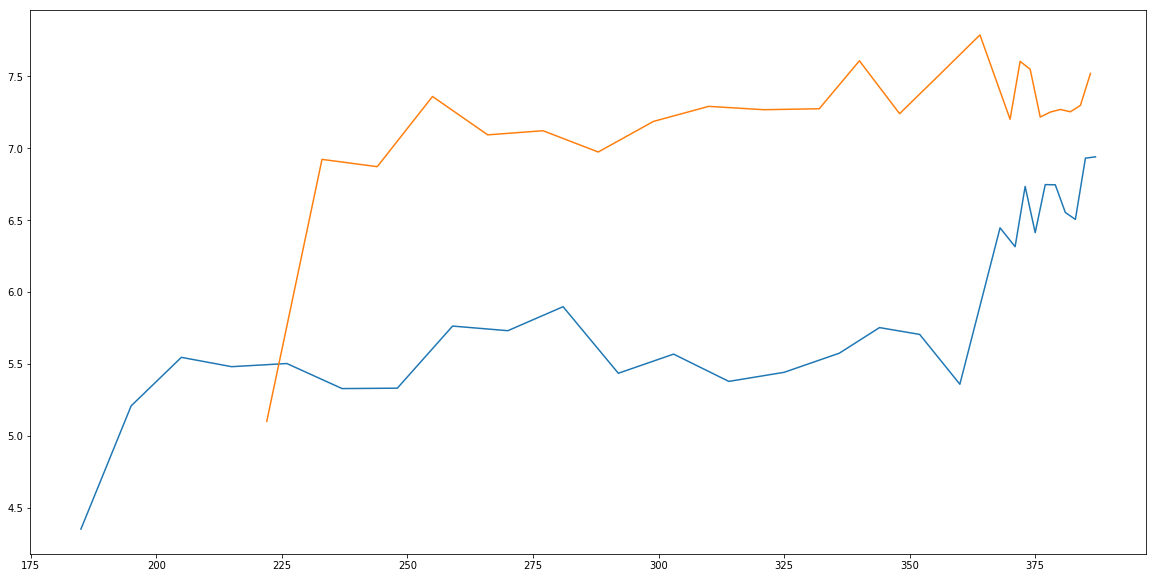

Product  4  in  England
Product  4  in  Finland


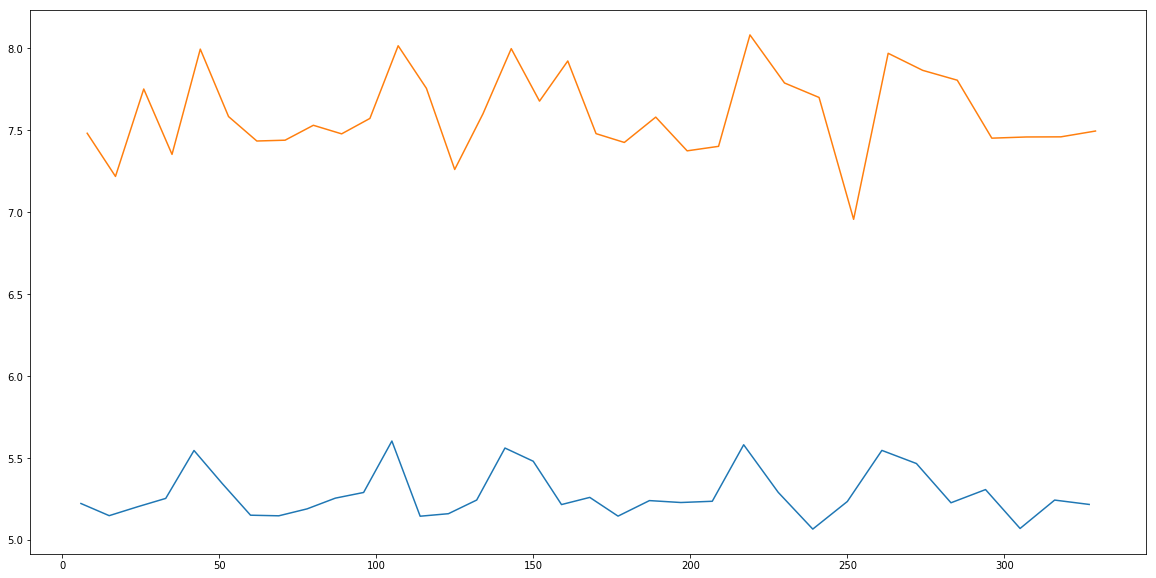

Product  5  in  England


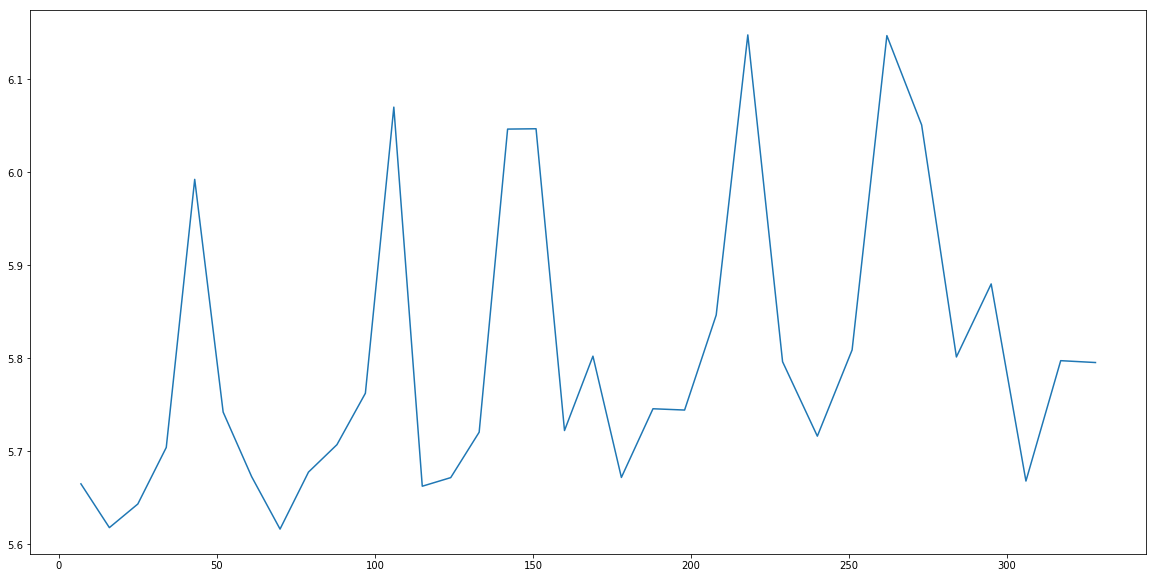

In [54]:
for i in range(1,len(set(train['Product_ID']))+1):
    tmp = list(set(train[train['Product_ID']==i]['Country']))
    for j in tmp:
        print('Product ',i,' in ',j)
        train[(train['Product_ID']==i)&(train['Country']==j)].sort_values(['Year','Month'])['Sales'].plot(figsize=(20,10))
    plt.show()

In [73]:
ohe_cols = ['Country','Product_ID']

# Label encoding

from sklearn.preprocessing import LabelEncoder
for i in ohe_cols:
    le = LabelEncoder()
    le.fit(pd.concat([train[i],test[i]],0))
    train[i] = le.transform(train[i])
    test[i] = le.transform(test[i])
    print(train.shape,test.shape)

print('Starting OHE')
# one hot encoding

from sklearn.preprocessing import OneHotEncoder
for i in ohe_cols:
    print(i,'\n',set(train[i]))

    ohe=OneHotEncoder(sparse =False)
    ohe.fit(train[i].values.reshape(-1,1))
    tmp=ohe.transform(train[i].values.reshape(-1,1))
    tmp=pd.DataFrame(tmp,dtype=int)
    tmp.columns=[i+str(j) for j in range(tmp.shape[1])]
    train=train.drop([i],1)
    train=pd.concat([train,tmp],1)
    
    tmp=ohe.transform(test[i].values.reshape(-1,1))
    tmp=pd.DataFrame(tmp,dtype=int)
    tmp.columns=[i+str(j) for j in range(tmp.shape[1])]
    test=test.drop([i],1)
    test=pd.concat([test,tmp],1)
    
    print(train.shape,' - ',test.shape)



(388, 7) (105, 7)
(388, 7) (105, 7)
Starting OHE
Country 
 {0, 1, 2, 3, 4, 5}
(388, 12)  -  (105, 12)
Product_ID 
 {0, 1, 2, 3, 4}
(388, 16)  -  (105, 16)


In [74]:
train.head()

,Year,Month,Sales,Holiday,Expense_Price,Country0,Country1,Country2,Country3,Country4,Country5,Product_ID0,Product_ID1,Product_ID2,Product_ID3,Product_ID4
0,2013,1,7.535876,1,4.168801,1,0,0,0,0,0,1,0,0,0,0
1,2013,1,6.439625,1,3.123974,0,0,1,0,0,0,0,1,0,0,0
2,2013,1,5.498105,1,2.398964,1,0,0,0,0,0,0,1,0,0,0
3,2013,1,6.897336,2,3.277408,0,0,1,0,0,0,1,0,0,0,0
4,2013,1,6.761197,2,3.157676,1,0,0,0,0,0,0,1,0,0,0


In [75]:
# Since Month is a cyclic feature, we need to sin and cos transform it
months_in_year = 12
train['sin_month'] = np.sin(2*np.pi*train.Month/months_in_year)
train['cos_month'] = np.cos(2*np.pi*train.Month/months_in_year)

test['sin_month'] = np.sin(2*np.pi*test.Month/months_in_year)
test['cos_month'] = np.cos(2*np.pi*test.Month/months_in_year)

train = train.drop(['Month'],1)
test = test.drop(['Month'],1)

In [76]:
test.head()

,Year,Holiday,Expense_Price,S_No,Country0,Country1,Country2,Country3,Country4,Country5,Product_ID0,Product_ID1,Product_ID2,Product_ID3,Product_ID4,sin_month,cos_month
0,2015,0,2.235947,79160,1,0,0,0,0,0,0,0,0,1,0,-5.000000e-01,0.866025
1,2015,0,2.621144,79151,0,0,1,0,0,0,0,0,0,0,1,-5.000000e-01,0.866025
2,2015,0,3.116518,79169,1,0,0,0,0,0,0,0,0,1,0,-5.000000e-01,0.866025
3,2015,3,2.291076,79161,0,0,1,0,0,0,0,0,0,1,0,-2.449294e-16,1.000000
4,2015,3,2.667781,79152,1,0,0,0,0,0,0,0,0,0,1,-2.449294e-16,1.000000


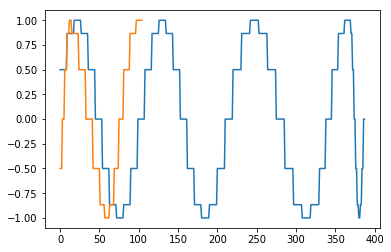

In [77]:
train.sin_month.plot()
test.sin_month.plot()
plt.show()

In [78]:
# Scaling year
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
sc.fit(np.reshape(pd.concat([train['Year'],test['Year']],0),(-1,1)))
train['Year'] = sc.transform(np.reshape(train['Year'],(-1,1)))
test['Year'] = sc.transform(np.reshape(test['Year'],(-1,1)))


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [79]:
sc= MinMaxScaler(feature_range=(0,1))
sc.fit(np.reshape(pd.concat([train['Holiday'],test['Holiday']],0),(-1,1)))
train['Holiday'] = sc.transform(np.reshape(train['Holiday'],(-1,1)))
test['Holiday'] = sc.transform(np.reshape(test['Holiday'],(-1,1)))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [80]:
train.head()

,Year,Sales,Holiday,Expense_Price,Country0,Country1,Country2,Country3,Country4,Country5,Product_ID0,Product_ID1,Product_ID2,Product_ID3,Product_ID4,sin_month,cos_month
0,0.0,7.535876,0.25,4.168801,1,0,0,0,0,0,1,0,0,0,0,0.5,0.866025
1,0.0,6.439625,0.25,3.123974,0,0,1,0,0,0,0,1,0,0,0,0.5,0.866025
2,0.0,5.498105,0.25,2.398964,1,0,0,0,0,0,0,1,0,0,0,0.5,0.866025
3,0.0,6.897336,0.50,3.277408,0,0,1,0,0,0,1,0,0,0,0,0.5,0.866025
4,0.0,6.761197,0.50,3.157676,1,0,0,0,0,0,0,1,0,0,0,0.5,0.866025


In [81]:
test.head()

,Year,Holiday,Expense_Price,S_No,Country0,Country1,Country2,Country3,Country4,Country5,Product_ID0,Product_ID1,Product_ID2,Product_ID3,Product_ID4,sin_month,cos_month
0,0.5,0.00,2.235947,79160,1,0,0,0,0,0,0,0,0,1,0,-5.000000e-01,0.866025
1,0.5,0.00,2.621144,79151,0,0,1,0,0,0,0,0,0,0,1,-5.000000e-01,0.866025
2,0.5,0.00,3.116518,79169,1,0,0,0,0,0,0,0,0,1,0,-5.000000e-01,0.866025
3,0.5,0.75,2.291076,79161,0,0,1,0,0,0,0,0,0,1,0,-2.449294e-16,1.000000
4,0.5,0.75,2.667781,79152,1,0,0,0,0,0,0,0,0,0,1,-2.449294e-16,1.000000


In [82]:
train.to_csv('Data/processed_train.csv',index=False)
test.to_csv('Data/processed_test.csv',index=False)